In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

2024-05-10 20:41:33.792505: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 20:41:33.796032: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 20:41:33.844292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 20:41:35.105638: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 3s - 78ms/step - loss: 0.0038
Epoch 2/20
35/35 - 3s - 75ms/step - loss: 0.0038
Epoch 3/20
35/35 - 3s - 77ms/step - loss: 0.0034
Epoch 4/20
35/35 - 3s - 75ms/step - loss: 0.0032
Epoch 5/20
35/35 - 3s - 76ms/step - loss: 0.0032
Epoch 6/20
35/35 - 3s - 76ms/step - loss: 0.0030
Epoch 7/20
35/35 - 3s - 77ms/step - loss: 0.0036
Epoch 8/20
35/35 - 3s - 76ms/step - loss: 0.0029
Epoch 9/20
35/35 - 2s - 69ms/step - loss: 0.0036
Epoch 10/20
35/35 - 3s - 76ms/step - loss: 0.0033
Epoch 11/20
35/35 - 3s - 76ms/step - loss: 0.0028
Epoch 12/20
35/35 - 3s - 76ms/step - loss: 0.0028
Epoch 13/20
35/35 - 3s - 75ms/step - loss: 0.0026
Epoch 14/20
35/35 - 3s - 74ms/step - loss: 0.0031
Epoch 15/20
35/35 - 3s - 74ms/step - loss: 0.0028
Epoch 16/20
35/35 - 3s - 75ms/step - loss: 0.0031
Epoch 17/20
35/35 - 3s - 75ms/step - loss: 0.0027
Epoch 18/20
35/35 - 3s - 75ms/step - loss: 0.0024
Epoch 19/20
35/35 - 3s - 74ms/step - loss: 0.0028
Epoch 20/20
35/35 - 3s - 74ms/step - loss: 0.0027


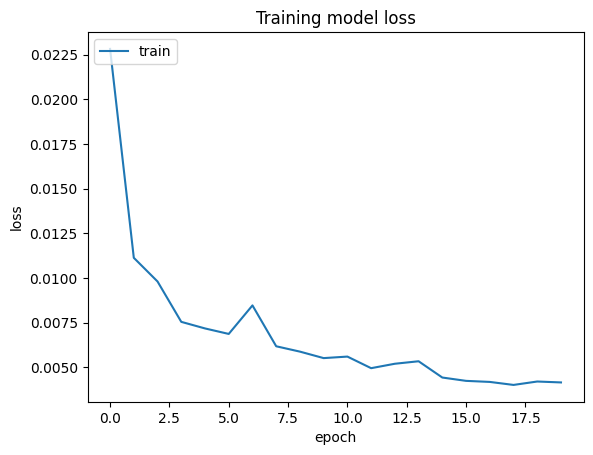

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


array([[1.2855623],
       [1.2776266],
       [1.296857 ],
       [1.3197327],
       [1.3238497],
       [1.2987278],
       [1.265278 ],
       [1.2450733],
       [1.2520726],
       [1.269942 ],
       [1.2611492],
       [1.2413679],
       [1.2316128],
       [1.2244099],
       [1.2335013],
       [1.2473665],
       [1.2818927],
       [1.3194263],
       [1.3476828],
       [1.3681644],
       [1.3445376],
       [1.3147073],
       [1.2762823],
       [1.246967 ],
       [1.24025  ],
       [1.2553594],
       [1.2755786],
       [1.278591 ],
       [1.2551589],
       [1.232544 ],
       [1.2172322],
       [1.2027596],
       [1.1751056],
       [1.1453688],
       [1.1593542],
       [1.2010137],
       [1.2378658],
       [1.2560629],
       [1.2642072],
       [1.2491736],
       [1.2566125],
       [1.2772776],
       [1.3007537],
       [1.3158698],
       [1.3183998],
       [1.30594  ],
       [1.2826072],
       [1.2809917],
       [1.2964796],
       [1.3198321],


In [25]:
predicted_price = sc.inverse_transform(y_pred)

predicted_price = predicted_price + (predicted_price * 0.02)


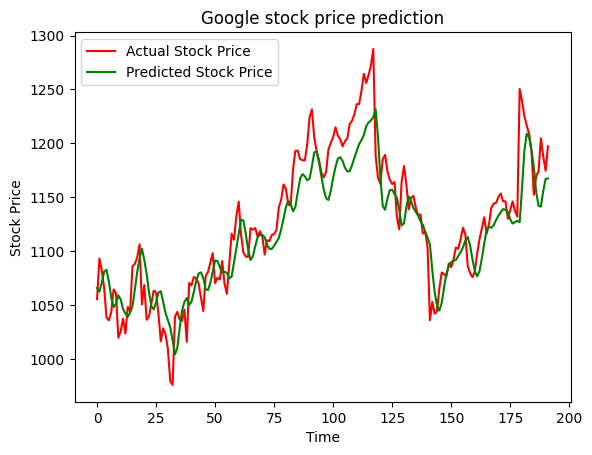

In [27]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
mse = np.mean((predicted_price - y_test) ** 2)
accuracy = 100 - mse  # Example metric, higher values indicate better accuracy

print("Mean Squared Error (MSE):", mse)
print("Accuracy:", accuracy)

Mean Squared Error (MSE): 797.1285496015088
Accuracy: -697.1285496015088
